<a href="https://colab.research.google.com/github/ugururesin/Deep_Learning_Projects/blob/main/Customization_of_Activation_and_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
## Importing Libraries
import tensorflow as tf
import numpy as np

In [10]:
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [4]:
## Testing Tensorflow Library
c1 = tf.constant(2)
c2 = tf.constant(5)
tf.multiply(c1,c2)

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [15]:
## Creating an Sigmoid Function
x = tf.constant(5.0)
sigmoid_val = tf.divide(1.0, tf.add(1.0, tf.exp(tf.negative(x))))
sigmoid_val

<tf.Tensor: shape=(), dtype=float32, numpy=0.9933072>

In [21]:
## Creating a Derivative
x = tf.constant([5.0])

with tf.GradientTape() as t:
  t.watch(x)
  y = tf.divide(1.0, tf.add(1.0, tf.exp(tf.negative(x))))


# Derivative of y with respect to the original input tensor x
dy_dx = t.gradient(y,x)
print("The sigmoid value: ", y)
print("The derivative of sigmoid: ", dy_dx)

The sigmoid value:  tf.Tensor([0.9933072], shape=(1,), dtype=float32)
The derivative of sigmoid:  tf.Tensor([0.00664806], shape=(1,), dtype=float32)


### Custom Loss Function

In [24]:
## Root Mean Square Error (RMSE)
def mean_pred(y_true, y_pred):
    return tf.sqrt(tf.divide(tf.reduce_sum(tf.pow(tf.subtract(y_true, y_pred),2.0)),tf.cast(tf.size(y_true), tf.float32)))

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output

# Compiling the Network
model.compile(loss=mean_pred, optimizer='adam')

# Training the Network
model_01 = model.fit(x,y,verbose=0,epochs=100)

In [41]:
history_dict1 = model_01.history
history_dict1.keys()

dict_keys(['loss'])

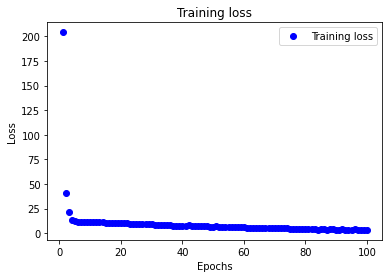

In [42]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt

loss_values = history_dict1['loss']
epochs = range(1, len(history_dict1['loss']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') #bo:blue-dot
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Custom Activation (Transfer) Functions

In [36]:
def elliot_sym(x):
    return tf.divide(x,tf.add(1.0,tf.abs(x)))

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression

# Build the neural network
sgd = tf.keras.optimizers.SGD(learning_rate=1e-10, decay=1e-6, momentum=0.9, nesterov=True)
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation=elliot_sym)) # Hidden 1
model.add(Dense(10, activation=elliot_sym)) # Hidden 2
model.add(Dense(1)) # Output

# Compiling the neural network
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model_02 = model.fit(x,y,verbose=0,epochs=400)

In [46]:
history_dict2 = model_02.history
history_dict2.keys()

dict_keys(['loss'])

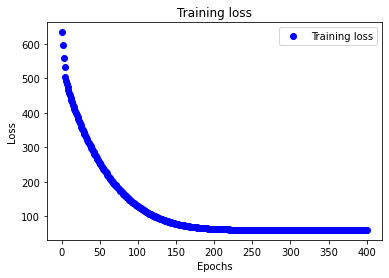

In [47]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt

loss_values = history_dict2['loss']
epochs = range(1, len(history_dict2['loss']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') #bo:blue-dot
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()